In [9]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
num_of_train_samples = X_train.shape[0]
num_of_test_samples = X_test.shape[0]
row = X_train.shape[1]
col = X_train.shape[2]

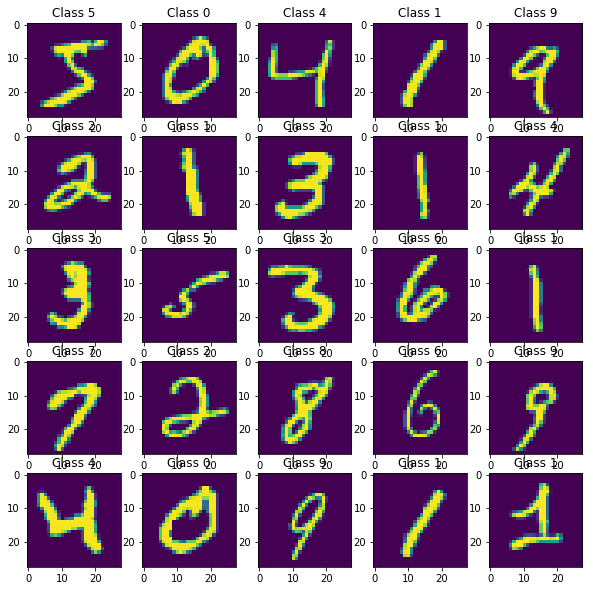

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.title("Class {}".format(y_train[i]))

In [13]:
y_train[0]

5

In [14]:
# RGB 0-255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(num_of_train_samples, row*col)
X_test = X_test.reshape(num_of_test_samples, row*col)

In [15]:
# convert to binary
y_train_bin = np_utils.to_categorical(y_train, 10)
y_test_bin = np_utils.to_categorical(y_test, 10)

In [16]:
# Init NN
model = Sequential()

# Input layer
model.add(Dense(512, activation='relu', input_shape=(row*col,)))
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train_bin,batch_size=100,epochs=100,validation_data=(X_test,y_test_bin))

score = model.evaluate(X_test, y_test_bin, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.0441 - acc: 0.9860 - val_loss: 0.0700 - val_acc: 0.9822
Epoch 2/100
60000/60000 [==============================] - 10s 166us/step - loss: 0.0376 - acc: 0.9875 - val_loss: 0.0723 - val_acc: 0.9800
Epoch 3/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.0354 - acc: 0.9885 - val_loss: 0.0646 - val_acc: 0.9830
Epoch 4/100
60000/60000 [==============================] - 10s 171us/step - loss: 0.0286 - acc: 0.9905 - val_loss: 0.0637 - val_acc: 0.9840
Epoch 5/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.0267 - acc: 0.9914 - val_loss: 0.0795 - val_acc: 0.9796
Epoch 6/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.0278 - acc: 0.9910 - val_loss: 0.0711 - val_acc: 0.9820
Epoch 7/100
60000/60000 [==============================] - 11s 191us/step - loss: 0.0219 - acc: 0.9928 - val_l

In [43]:
predicted = model.predict_classes(X_test)

In [44]:
# predicted = np.array(predicted)
corrected = []
incorrected = []
for i in range(len(predicted)):
    if(predicted[i] == y_test[i]):
        corrected.append(int(i))
    else:
        incorrected.append(int(i))

In [45]:
corr = len(corrected)
incorr = len(incorrected)

In [46]:
print(corr,incorr)

9857 143
